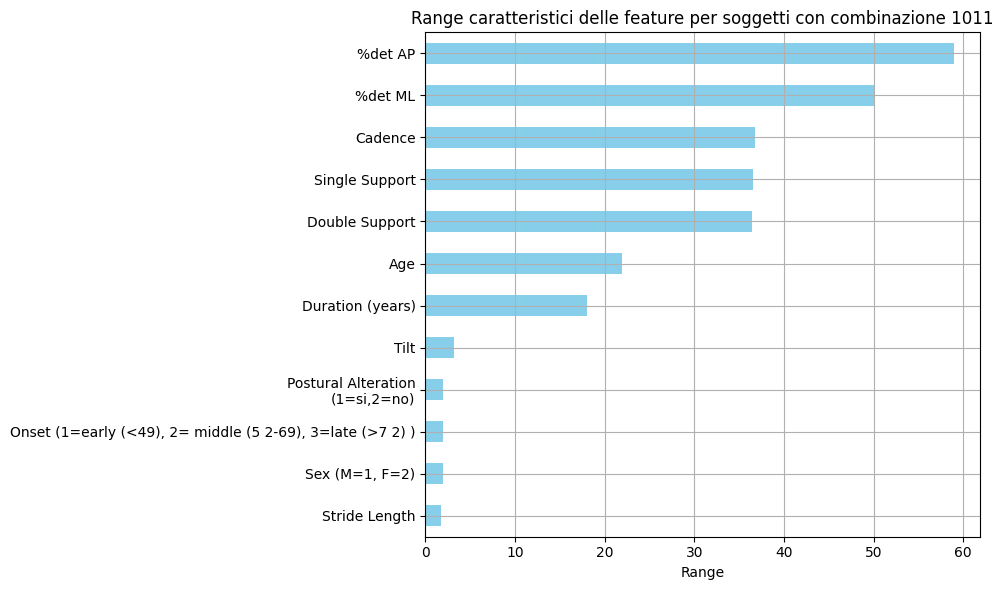

In [43]:
import pandas as pd

# 📥 Carica il dataset
df = pd.read_csv("../data/prodromi_ctgan_final.csv")

# 🎯 Filtro per soggetti con combinazione 1011
df_1011 = df[df["prodromi_combo"] == 1011]

# ✅ Seleziona solo le feature biomeccaniche e cliniche rilevanti
selected_features = ['%det ML', '%det AP',
                     'Sex (M=1, F=2)', 'Age', 'Duration (years)',
                     'Onset (1=early (<49), 2= middle (5 2-69), 3=late (>7 2) )',
                     'Postural Alteration\n(1=si,2=no)',
                     'Tilt', 'Double Support', 'Single Support',
                     'Stride Length', 'Cadence']

# 📊 Calcolo range (min, max, media, std) per soggetti con 1011
summary_1011 = df_1011[selected_features].agg(["min", "max", "mean", "std"]).transpose()

# 🔍 Aggiunge colonna "range"
summary_1011["range"] = summary_1011["max"] - summary_1011["min"]

# 📤 Visualizza
import seaborn as sns
import matplotlib.pyplot as plt

# Istogramma dei range
summary_1011["range"].sort_values().plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.xlabel("Range")
plt.title("Range caratteristici delle feature per soggetti con combinazione 1011")
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
# 💾 Salva tabella
summary_1011.to_excel("range_features_1011.xlsx")

In [46]:
import pandas as pd

# Carica il dataset
df = pd.read_csv("../data/prodromi_ctgan_final.csv")

# Crea colonna binaria: target = 1 se combo 1011
df["target_1011"] = (df["prodromi_combo"] == 1011).astype(int)

# Filtra solo i soggetti con combo 1011
df_1011 = df[df["target_1011"] == 1]

# Seleziona le feature su cui vuoi calcolare il range decisionale
features_to_analyze = [
    "%det ML", "%det AP",
    "Sex (M=1, F=2)", "Age", "Duration (years)",
    "Onset (1=early (<49), 2= middle (5 2-69), 3=late (>7 2) )",
    "Postural Alteration\n(1=si,2=no)",
    "Tilt", "Double Support", "Single Support",
    "Stride Length", "Cadence"
]
# Crea tabella con statistiche
stats = df_1011[features_to_analyze].agg(['min', 'max', 'mean', 'std'])
stats.loc['range'] = stats.loc['max'] - stats.loc['min']

# Mostra la tabella
print(stats)

         %det ML    %det AP  Sex (M=1, F=2)        Age  Duration (years)  \
min    25.389000  15.322000        0.000000  64.000000          3.000000   
max    75.429000  74.253000        2.000000  86.000000         21.000000   
mean   41.669750  40.377925        1.300000  69.925000         11.891892   
std    15.549438  19.451734        0.563869   6.248641          6.203869   
range  50.040000  58.931000        2.000000  22.000000         18.000000   

       Onset (1=early (<49), 2= middle (5 2-69), 3=late (>7 2) )  \
min                                             1.000000           
max                                             3.000000           
mean                                            1.756757           
std                                             0.596537           
range                                           2.000000           

       Postural Alteration\n(1=si,2=no)      Tilt  Double Support  \
min                            0.000000  1.700000        6.650000